# Metagenome sample Host genome contamination - belongs?

- In contamination analysis, **"human", "mouse", "chicken", "pig" are four most contaminated host genomes** among 3k metagenomes samples.

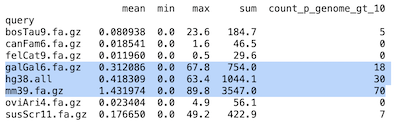
- we wonder **how that contamination matches the annotation of what host the metagenome is from**?
- So I aim to do the following analysis:
    - **merge** "3k.hg.csv" with "list.csv" for "biome2" info
    - **pull out metagenomes with >5% p_genome and count the # based on the "biome2" type**

In [1]:
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


In [2]:
# Load the data
data = pd.read_csv('/Users/ZYZhao/projects/AL/onek/analysis/3k.hg.csv')
data

,query,p_genome,avg_abund,p_metag,metagenome name
0,bosTau9.fa.gz,0.00%,1.0,0.00%,ERR9456920
1,bosTau9.fa.gz,0.00%,1.2,0.00%,ERR3610816
2,bosTau9.fa.gz,0.00%,1.0,0.00%,SRR7664969
3,bosTau9.fa.gz,0.00%,20.2,0.10%,SRR12180980
4,bosTau9.fa.gz,0.00%,3.2,0.00%,SRR6713626
...,...,...,...,...,...
19440,susScr11.fa.gz,0.00%,7.9,0.10%,SRR5808817
19441,susScr11.fa.gz,0.00%,1.5,0.00%,SRR10810041
19442,susScr11.fa.gz,0.00%,2.6,0.00%,ERR2607371
19443,susScr11.fa.gz,0.00%,12.6,0.10%,SRR12180994


In [3]:
data_list = pd.read_csv('/Users/ZYZhao/projects/AL/onek/analysis/1_zyzhao-list-oct3.csv')

data_list_biome2 = data_list[['accession', 'biome2']]
data_list_biome2

,accession,biome2
0,SRR7299214,Engineered:Solid waste
1,SRR6490006,Host-associated:Microbial
2,SRR6490005,Host-associated:Microbial
3,SRR6490004,Host-associated:Microbial
4,SRR6490003,Host-associated:Microbial
...,...,...
3033,ERR3341539,Environmental:Aquatic
3034,ERR3341563,Environmental:Aquatic
3035,SRR6193124,Environmental:Aquatic
3036,SRR5268667,Environmental:Aquatic


In [4]:
# Merge the data on 'metagenome name' from data and 'assession' from data_list
merged_biome2 = pd.merge(data, data_list_biome2, left_on='metagenome name', right_on='accession', how='left')

# Display the merged data
print(merged_biome2.head())
merged_biome2.to_csv('merged_biome2.csv', index=False) 

           query p_genome  avg_abund p_metag metagenome name    accession  \
0  bosTau9.fa.gz    0.00%        1.0   0.00%      ERR9456920   ERR9456920   
1  bosTau9.fa.gz    0.00%        1.2   0.00%      ERR3610816   ERR3610816   
2  bosTau9.fa.gz    0.00%        1.0   0.00%      SRR7664969   SRR7664969   
3  bosTau9.fa.gz    0.00%       20.2   0.10%     SRR12180980  SRR12180980   
4  bosTau9.fa.gz    0.00%        3.2   0.00%      SRR6713626   SRR6713626   

                    biome2  
0    Environmental:Aquatic  
1  Host-associated:Mammals  
2  Host-associated:Mammals  
3  Host-associated:Insecta  
4   Engineered:Solid waste  


In [5]:
biome2 = pd.read_csv('/Users/ZYZhao/projects/AL/onek/analysis/merged_biome2.csv')
biome2

,query,p_genome,avg_abund,p_metag,metagenome name,accession,biome2
0,bosTau9.fa.gz,0.00%,1.0,0.00%,ERR9456920,ERR9456920,Environmental:Aquatic
1,bosTau9.fa.gz,0.00%,1.2,0.00%,ERR3610816,ERR3610816,Host-associated:Mammals
2,bosTau9.fa.gz,0.00%,1.0,0.00%,SRR7664969,SRR7664969,Host-associated:Mammals
3,bosTau9.fa.gz,0.00%,20.2,0.10%,SRR12180980,SRR12180980,Host-associated:Insecta
4,bosTau9.fa.gz,0.00%,3.2,0.00%,SRR6713626,SRR6713626,Engineered:Solid waste
...,...,...,...,...,...,...,...
19440,susScr11.fa.gz,0.00%,7.9,0.10%,SRR5808817,SRR5808817,Environmental:Aquatic
19441,susScr11.fa.gz,0.00%,1.5,0.00%,SRR10810041,SRR10810041,Host-associated:Insecta
19442,susScr11.fa.gz,0.00%,2.6,0.00%,ERR2607371,ERR2607371,Engineered:Wastewater
19443,susScr11.fa.gz,0.00%,12.6,0.10%,SRR12180994,SRR12180994,Host-associated:Insecta


In [14]:
biome2 = pd.read_csv('/Users/ZYZhao/projects/AL/onek/analysis/merged_biome2.csv')
biome2['p_genome'] = biome2['p_genome'].str.rstrip('%').astype('float') / 100

# Filter the DataFrame to include only rows where 'p_genome' is greater than 10%
filtered_data = biome2[biome2['p_genome'] > 0.05]

# Group the filtered data by 'biome2' and count the occurrences
biome2_counts = filtered_data['biome2'].value_counts()

# Display the count of metagenomes per 'biome2' type
print(biome2_counts)

Host-associated:Mammals    123
Host-associated:Animal      38
Host-associated:Human       38
Host-associated:Birds       10
Engineered:Modeled           6
Host-associated:Insecta      1
Name: biome2, dtype: int64


In [15]:
import plotly.express as px
import pandas as pd

biome2 = pd.read_csv('/Users/ZYZhao/projects/AL/onek/analysis/merged_biome2.csv')
biome2['p_genome'] = biome2['p_genome'].str.rstrip('%').astype('float') / 100

# Ensure 'p_metag' is a float
biome2['p_metag'] = pd.to_numeric(biome2['p_metag'], errors='coerce')

# Filter the data for p_genome greater than 10%
filtered_high_p_genome = biome2[biome2["p_genome"] > 0.05]

# Create an interactive scatter plot
fig = px.scatter(
    filtered_high_p_genome,
    x="query",
    y="p_genome",
    
    color="biome2",  # Color code dots based on biome2 type
    title="Interactive Scatter Plot of Query vs P Genome (p_genome > 10%)",
    labels={"query": "Query", "p_genome": "P Genome (%)"},
    hover_data=["metagenome name", "avg_abund", "p_metag"]
)

# Show the interactive chart
fig.show()

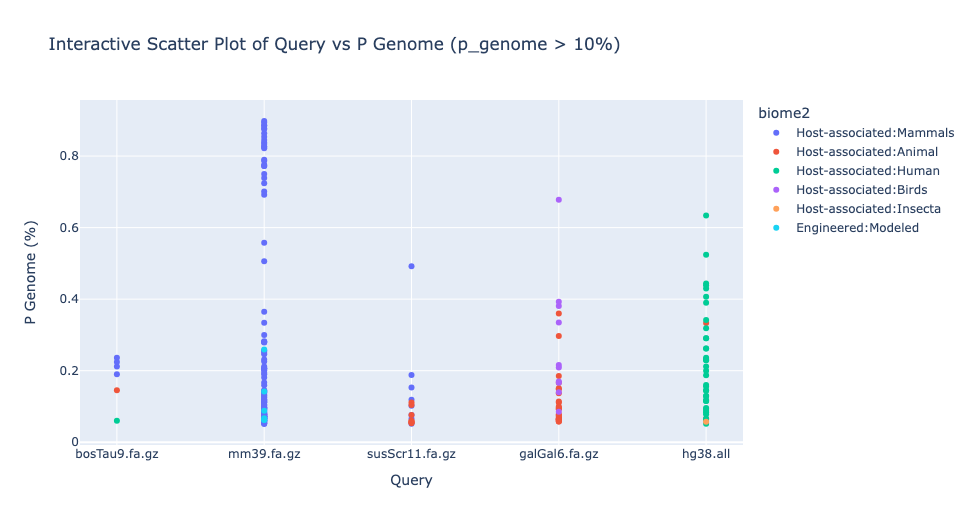